In [5]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [11, 7]
office_df = pd.read_csv("datasets/office_episodes.csv")
office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 19.4+ KB


In [6]:
def create_colors(df: pd.DataFrame) -> list:
    colors = []
    for lab, row in df.iterrows():
        if row["scaled_ratings"] < 0.25:
            colors.append("red")
        elif row["scaled_ratings"] < 0.5:
            colors.append("orange")
        elif row["scaled_ratings"] < 0.75:
            colors.append("lightgreen")
        else:
            colors.append("darkgreen")
    return colors


def create_sizes(df: pd.DataFrame) -> list:
    sizes = []
    for lab, row in df.iterrows():
        if row["has_guests"]:
            sizes.append(250)
        else:
            sizes.append(25)
    return sizes


In [7]:
office_df["colors"] = create_colors(office_df)
office_df["sizes"] = create_sizes(office_df)
guest_df = office_df[office_df["has_guests"] == True]
non_guest_df = office_df[office_df["has_guests"] == False]

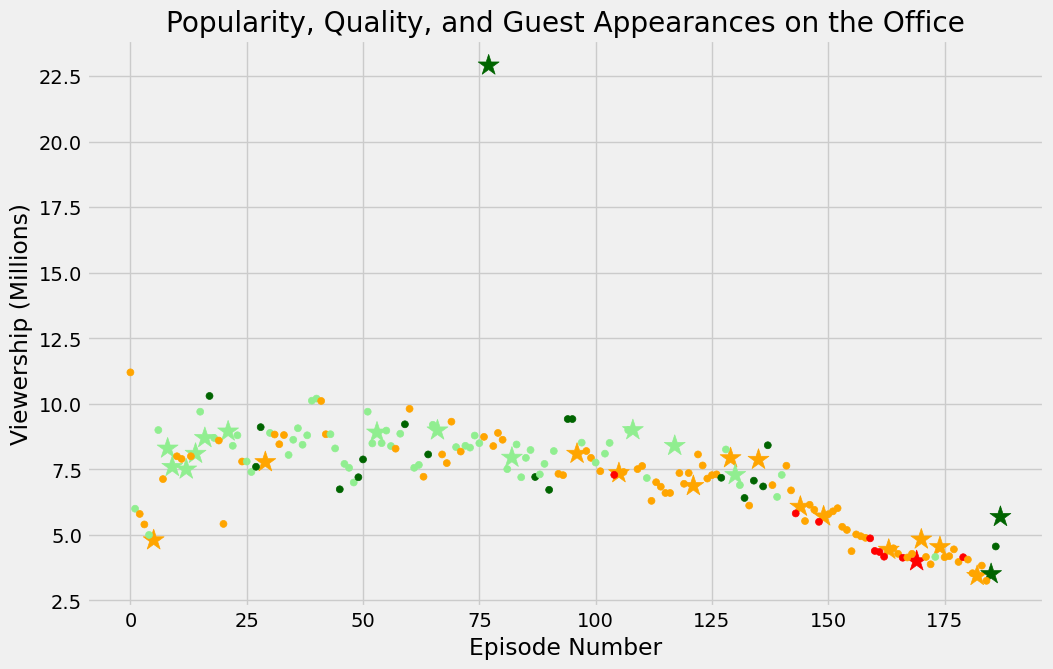

In [11]:
fig = plt.figure()
plt.style.use("fivethirtyeight")

# plt.scatter(x = office_df["episode_number"], 
#             y = office_df["viewership_mil"], 
#             c = create_colors(office_df), 
#             s = create_sizes(office_df)) 

plt.scatter(x = guest_df["episode_number"],
            y = guest_df["viewership_mil"],
            c = guest_df["colors"],
            s = guest_df["sizes"],
            marker = "*")

plt.scatter(x = non_guest_df["episode_number"],
            y = non_guest_df["viewership_mil"],
            c = non_guest_df["colors"],
            s = non_guest_df["sizes"])

plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")

plt.show()

In [12]:
most_watched = office_df[office_df["viewership_mil"] == office_df["viewership_mil"].max()]
top_star = list(most_watched["guest_stars"])[0].split(",")[0]
print(top_star)

Cloris Leachman
